
## Trabajo de investigación 

### Guillermo Manuel Nievas


#### El dataset cuenta con la información de la suma de todos los vuelos que aterrizaron en el Aeropuerto Internacional de San Francisco (SFO) por mes y por aerolinea desde Julio de 2005 a Junio de 2020.






In [1]:
#importa numpy
import numpy as np
#importa pandas
import pandas as pd
#importo matplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aeropuertosfo = pd.read_csv("Air_Traffic_Landings_Statistics.csv" , delimiter=',')

In [3]:
aeropuertosfo

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25127,202006,United Airlines,UA,United Airlines,UA,Domestic,US,Passenger,Wide Body,Boeing,B789,-,24,10200000
25128,202006,United Airlines,UA,United Airlines,UA,International,Asia,Passenger,Wide Body,Boeing,B789,-,56,23800000
25129,202006,United Airlines,UA,United Airlines,UA,International,Australia / Oceania,Passenger,Wide Body,Boeing,B789,-,30,12750000
25130,202006,United Airlines,UA,United Airlines,UA,International,Europe,Passenger,Wide Body,Boeing,B789,-,12,5100000


### 1) ¿Cual es la aerolinea con mas aterrizajes en SFO desde Julio 2005 a Junio 2020?

In [4]:
aerolineas = aeropuertosfo['Operating Airline'].unique()
listaAterrizajes = []
for aero in aerolineas:
    datosaerolinea = aeropuertosfo[aeropuertosfo['Operating Airline']==aero]['Landing Count']   
    sumaAterrizajes = datosaerolinea.sum()
    listaAterrizajes.append(sumaAterrizajes)

df = pd.DataFrame(listaAterrizajes,index=[aerolineas],columns=['Cantidad de Aterrizajes'])    

In [5]:
df

,Cantidad de Aterrizajes
ABX Air,6622
ATA Airlines,1396
Air Canada,45808
Air China,5165
Air France,6465
...,...
Air Italy S.P.A,115
El Al Israel Airlines LTD.,120
TAP Air Portugal,174
Norwegian Air Shuttle ASA,82


In [6]:
df[df['Cantidad de Aterrizajes'] == df['Cantidad de Aterrizajes'].max()]

,Cantidad de Aterrizajes
SkyWest Airlines,639144


### 2) ¿Que tipo de avion mas opera en SFO (Pasajeros, carguero o combinado)?

Text(0, 0.5, 'Cantidad de vuelos')

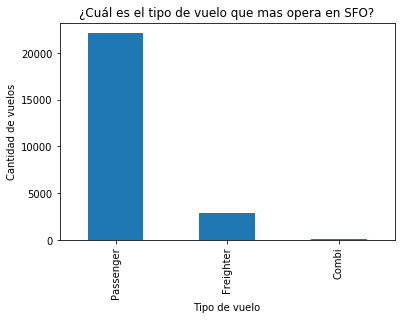

In [7]:
valores = aeropuertosfo['Landing Aircraft Type'].value_counts()

valores.plot.bar()
plt.title("¿Cuál es el tipo de vuelo que mas opera en SFO?")
plt.xlabel("Tipo de vuelo")
plt.ylabel("Cantidad de vuelos")


### 3) ¿Cuál es el fabricante de avion que mas opera en SFO?

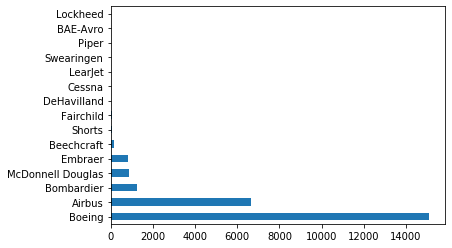

In [8]:
fabricantesValores = aeropuertosfo['Aircraft Manufacturer'].value_counts()

fabricantesValores.plot.barh()

#### 4) ¿Qué modelo de avion realizó mas aterrizajes en SFO?

In [9]:
modelosValores = aeropuertosfo['Aircraft Model'].value_counts().to_frame('Cantidad')

modelosValores.head(1)

,Cantidad
737,3134


### 5) ¿Cuál es la zona que mas vuelos tiene al aeropuerto SFO?

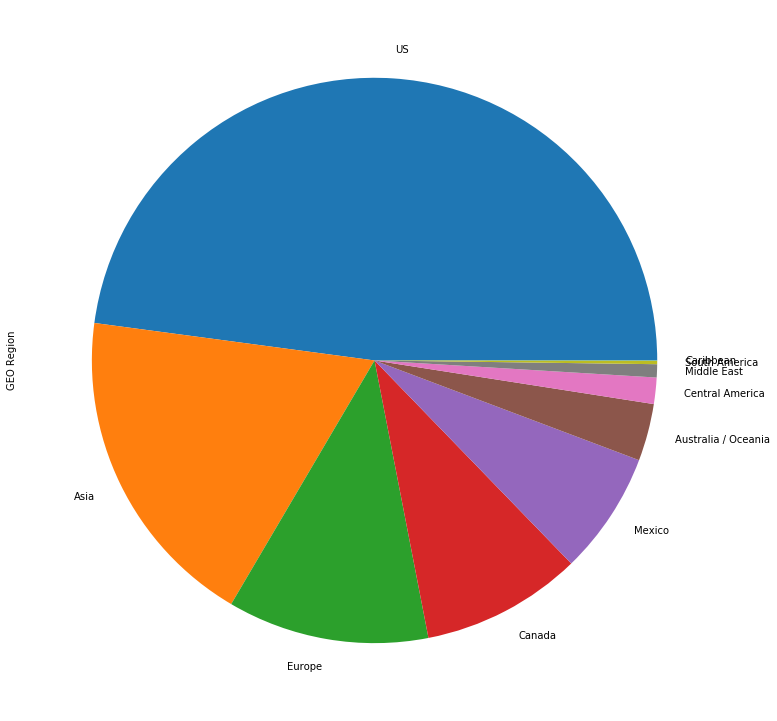

In [10]:
region = aeropuertosfo['GEO Region'].value_counts()

#region.plot.barh()
region.plot(figsize=(25,13))
region.plot.pie()

### 6) Información del vuelo que menos carga transportó a SFO

In [11]:
aeropuertosfo[aeropuertosfo['Total Landed Weight'] == aeropuertosfo['Total Landed Weight'].min()]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
20734,201801,Redding Aero Enterprises,bxr,Redding Aero Enterprises,bxr,Domestic,US,Freighter,Turbo Prop,Cessna,C402,-,1,6850


In [12]:
peso = aeropuertosfo['Total Landed Weight'].min()

pesoTonelada = float(peso / 2205)

print("El peso de carga de este vuelo en toneladas fue de:", "{:.2f}".format(pesoTonelada))

El peso de carga de este vuelo en toneladas fue de: 3.11


### 7) Información del mes y aerolinea que mas carga transportó a SFO

In [13]:
aeropuertosfo[aeropuertosfo['Total Landed Weight'] == aeropuertosfo['Total Landed Weight'].max()]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
23752,201908,United Airlines,UA,United Airlines,UA,Domestic,US,Passenger,Narrow Body,Airbus,A320,-,1958,275840010


In [14]:
peso = aeropuertosfo['Total Landed Weight'].max()

pesoTonelada = float(peso / 2205)

print("El peso de carga de estos vuelos en toneladas fue de:", "{:.2f}".format(pesoTonelada))

El peso de carga de estos vuelos en toneladas fue de: 125097.51
